<a href="https://colab.research.google.com/github/PedroC-dev/RelatorioAtividadesPDI/blob/main/transformada_fourier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Formato: None, Tamanho: (168, 246), Modo: L


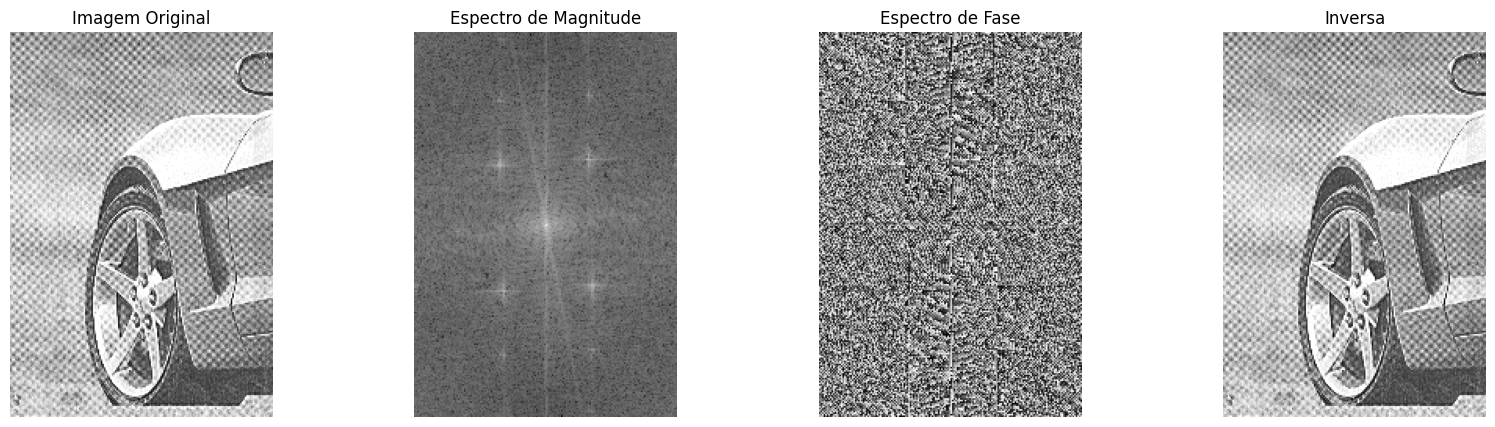

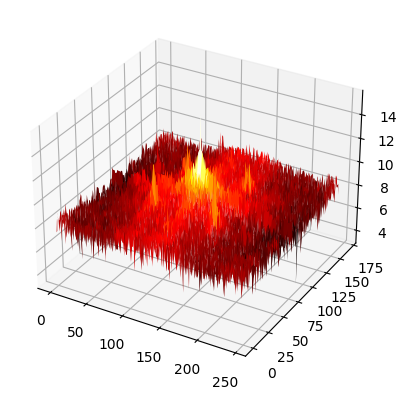

Formato: None, Tamanho: (225, 225), Modo: L


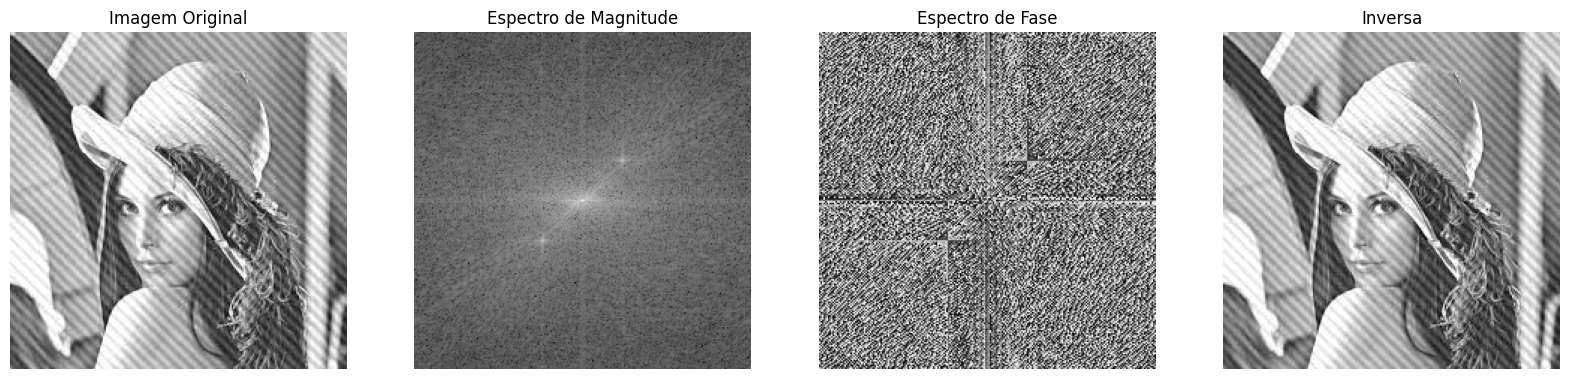

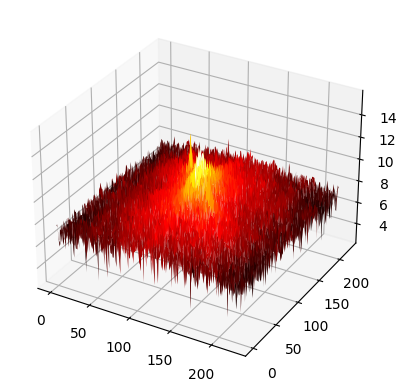

Formato: None, Tamanho: (730, 831), Modo: L


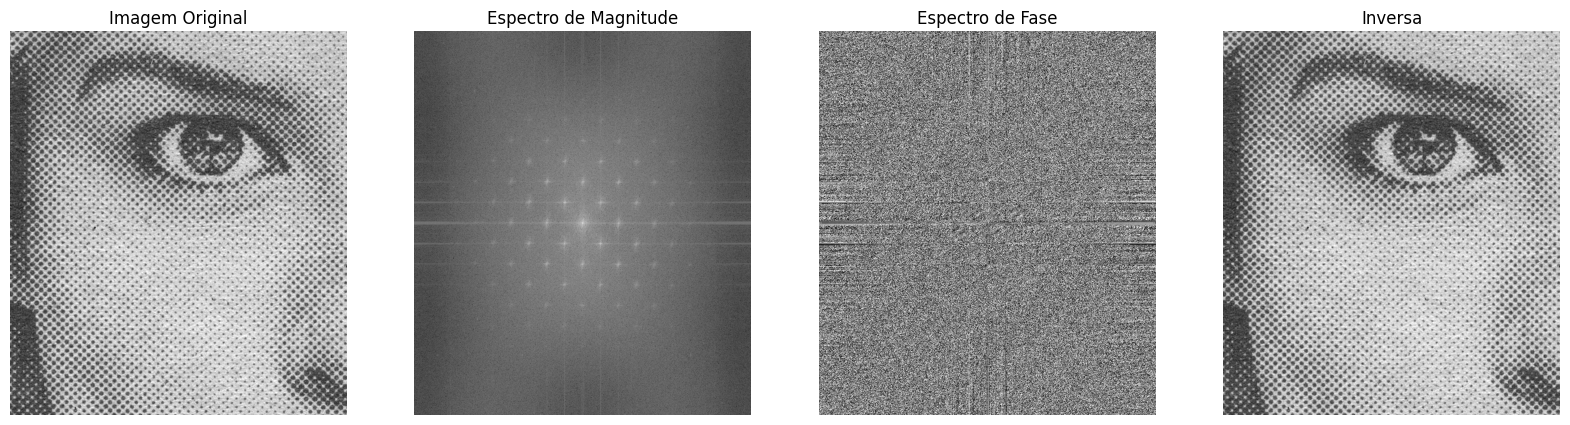

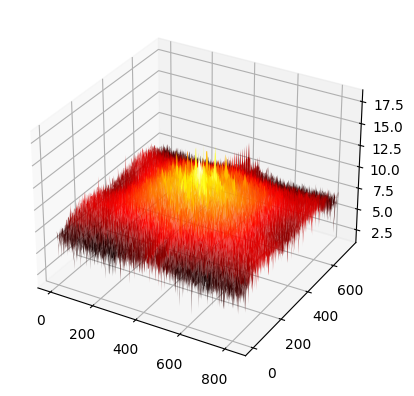

Formato: None, Tamanho: (240, 320), Modo: L


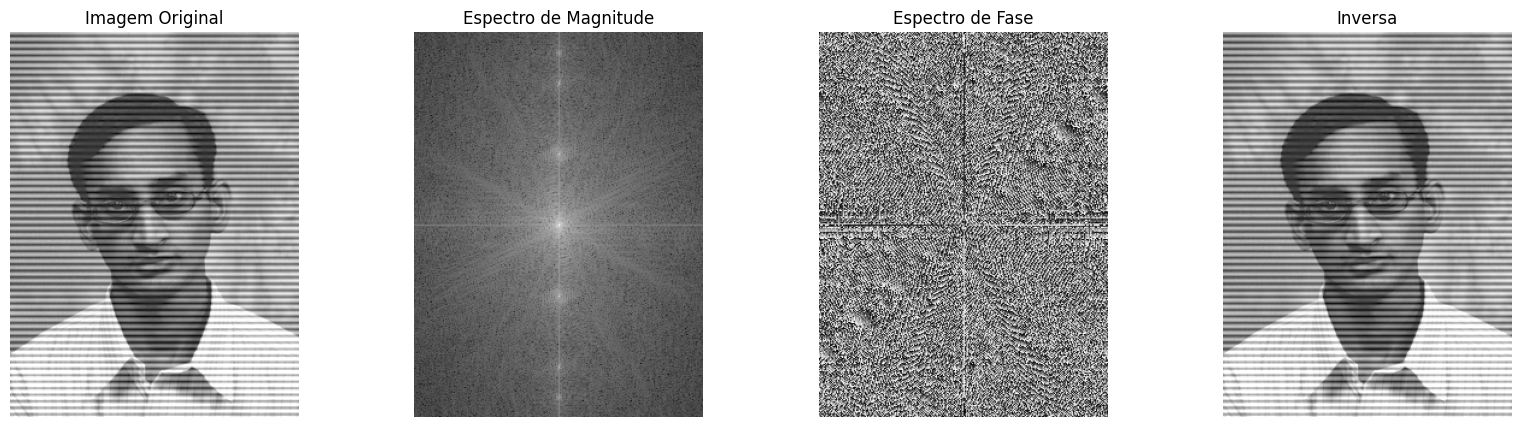

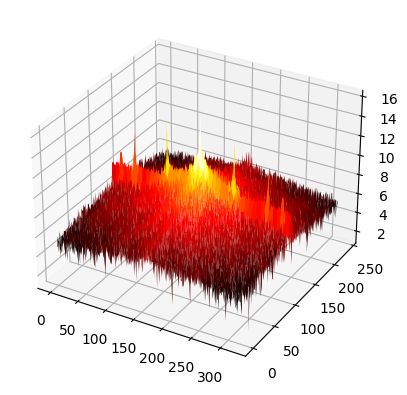

Formato: None, Tamanho: (600, 600), Modo: L


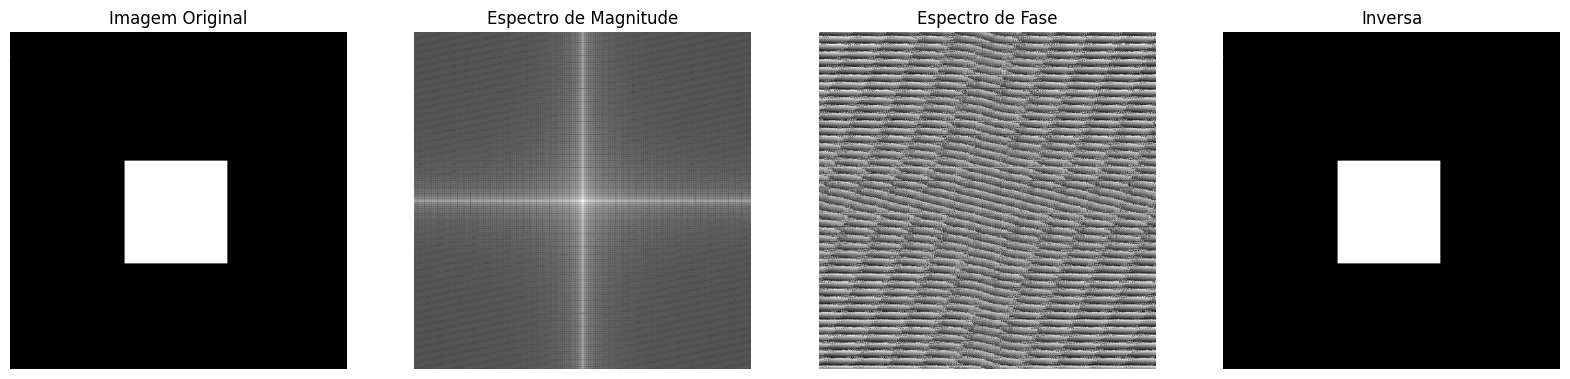

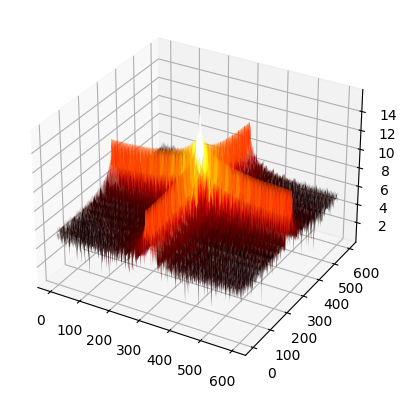

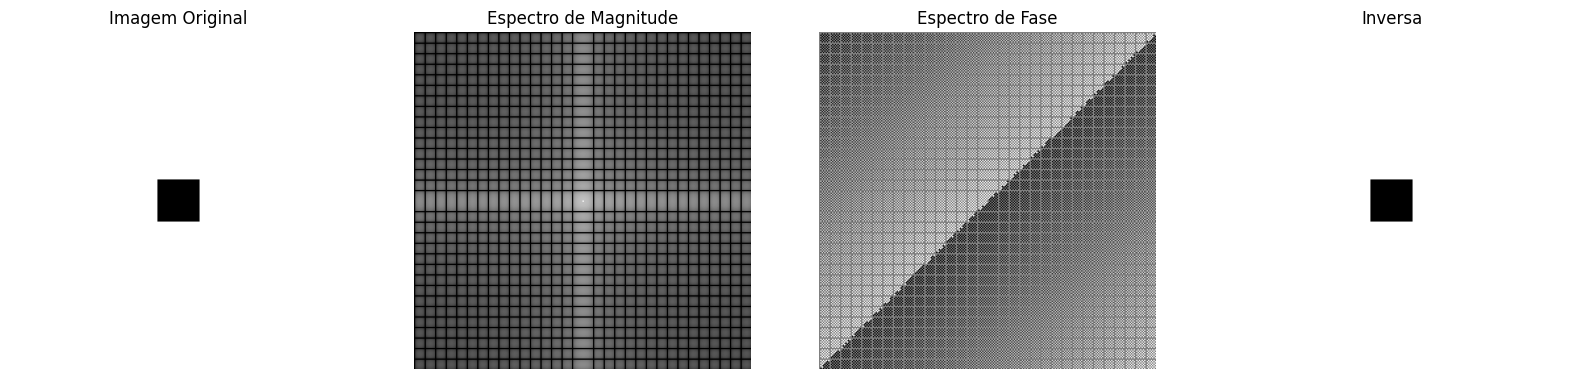

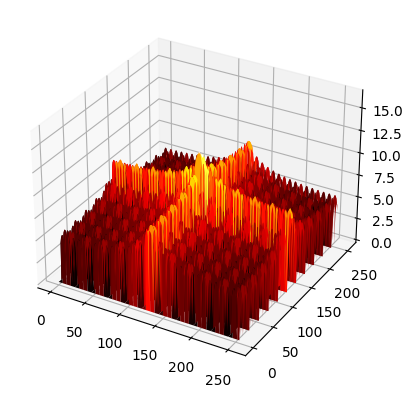

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, ifft2, fftshift, ifftshift
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image

# 1. Função para carregar e converter uma imagem para escala de cinza
def carregar_imagem(caminho):
    imagem = Image.open(caminho).convert('L')
    print(f"Formato: {imagem.format}, Tamanho: {imagem.size}, Modo: {imagem.mode}")
    return np.array(imagem)

# 2. Função para calcular a Transformada de Fourier
def calcular_transformada_fourier(imagem):
    transformada = fft2(imagem)
    transformada_centralizada = fftshift(transformada)  # Centralizar o espectro
    espectro_magnitude = np.log(np.abs(transformada_centralizada) + 1)
    espectro_fase = np.angle(transformada_centralizada)
    return transformada_centralizada, espectro_magnitude, espectro_fase

# 3. Função para calcular a Transformada Inversa de Fourier
def calcular_transformada_inversa(transformada_centralizada):
    transformada_inversa = ifftshift(transformada_centralizada)
    imagem_inversa = np.abs(ifft2(transformada_inversa))
    return imagem_inversa

# 4. Função para exibir a imagem original, espectro de magnitude, fase e imagem inversa
def exibir_transformadas(imagem_original, magnitude, fase, imagem_inversa):
    plt.figure(figsize=(20, 5))

    plt.subplot(1, 4, 1)
    plt.imshow(imagem_original, cmap='gray')
    plt.title('Imagem Original')
    plt.axis('off')

    plt.subplot(1, 4, 2)
    plt.imshow(magnitude, cmap='gray')
    plt.title('Espectro de Magnitude')
    plt.axis('off')

    plt.subplot(1, 4, 3)
    plt.imshow(fase, cmap='gray')
    plt.title('Espectro de Fase')
    plt.axis('off')

    plt.subplot(1, 4, 4)
    plt.imshow(imagem_inversa, cmap='gray')
    plt.title('Inversa')
    plt.axis('off')

    plt.show()

# 5. Função para exibir o espectro de magnitude em 3D
def exibir_espectro_3d(espectro_magnitude):
    xx, yy = np.mgrid[0:espectro_magnitude.shape[0], 0:espectro_magnitude.shape[1]]
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(xx, yy, espectro_magnitude, cmap='hot', edgecolor='none')
    plt.show()

# 6. Função para criar uma imagem com fundo branco e quadrado simulando a função SINC
def criar_imagem_com_sinc(tamanho=256, tamanho_quadrado=32):
    imagem = np.ones((tamanho, tamanho), dtype=np.uint8) * 255
    centro = tamanho // 2
    inicio_quadrado = centro - tamanho_quadrado // 2
    fim_quadrado = centro + tamanho_quadrado // 2
    imagem[inicio_quadrado:fim_quadrado, inicio_quadrado:fim_quadrado] = 0
    return imagem

# 7. Função principal para executar o processamento em várias imagens
def executar_processamento_imagens():
    # Lista de caminhos das imagens para processamento
    caminhos_imagens = ['car.tif', 'len_periodic_noise.png', 'newspaper_shot_woman.tif', 'periodic_noise.png', 'sinc.png']

    for caminho in caminhos_imagens:
        # Carregar a imagem
        imagem = carregar_imagem(caminho)

        # Calcular transformada de Fourier e inversa
        transformada, espectro_magnitude, espectro_fase = calcular_transformada_fourier(imagem)
        imagem_inversa = calcular_transformada_inversa(transformada)

        # Mostrar imagens resultantes
        exibir_transformadas(imagem, espectro_magnitude, espectro_fase, imagem_inversa)

        # Exibir espectro de magnitude em 3D
        exibir_espectro_3d(espectro_magnitude)

    # Processar e exibir a imagem SINC
    imagem_sinc = criar_imagem_com_sinc()
    sinc_transformada, sinc_magnitude, sinc_fase = calcular_transformada_fourier(imagem_sinc)
    sinc_inversa = calcular_transformada_inversa(sinc_transformada)

    # Mostrar resultados da imagem SINC
    exibir_transformadas(imagem_sinc, sinc_magnitude, sinc_fase, sinc_inversa)
    exibir_espectro_3d(sinc_magnitude)

# 8. Execução principal
if __name__ == "__main__":
    executar_processamento_imagens()
